### **Importing Dependancies**

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### **Loadind data**

In [194]:
loan_data = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### **Analyze and Preprocess data**

In [195]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [196]:
loan_data.shape

(614, 13)

In [197]:
#Checking Null values in Dataset
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [198]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [199]:
#Removing Null values
loan_data = loan_data.dropna()

In [200]:
loan_data.isnull().count()
loan_data.shape

(480, 13)

In [201]:
#Checking if Data can be convert to neumetics?
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [202]:
#lets make Loan_Status, Y=1 , N=0
loan_data.replace({'Loan_Status': {'Y':1, 'N':0}}, inplace = True)

<ipython-input-202-c55587f0d66b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({'Loan_Status': {'Y':1, 'N':0}}, inplace = True)
<ipython-input-202-c55587f0d66b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.replace({'Loan_Status': {'Y':1, 'N':0}}, inplace = True)


In [203]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [204]:
#Checking value of dependents
loan_data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [205]:
# As 3+ is not good to work with the model, hence our other data is in neumetical form
loan_data  = loan_data.replace(to_replace='3+' , value=4)
loan_data['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


### **Data Visualization**

<Axes: xlabel='Education', ylabel='count'>

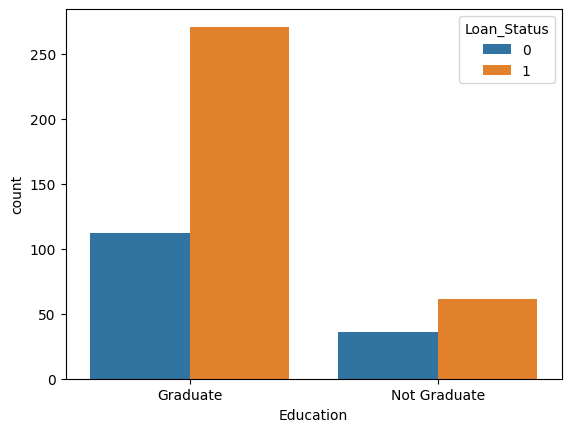

In [206]:
#Visulize the relationship between Education & Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=loan_data)

<Axes: xlabel='Gender', ylabel='count'>

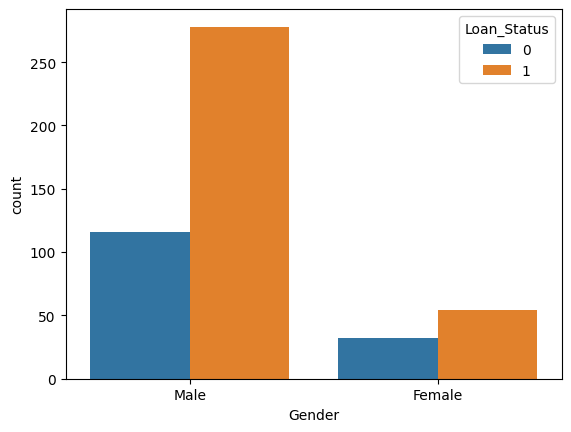

In [207]:
#Visulizing relationship between Gender and Loan Status
sns.countplot(x='Gender', hue='Loan_Status', data=loan_data)

<Axes: xlabel='Married', ylabel='count'>

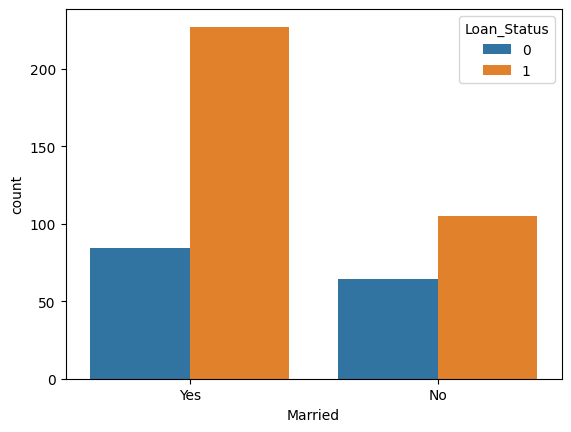

In [208]:
#visulizing relationship between married status and loan status
sns.countplot(x='Married', hue='Loan_Status', data=loan_data)

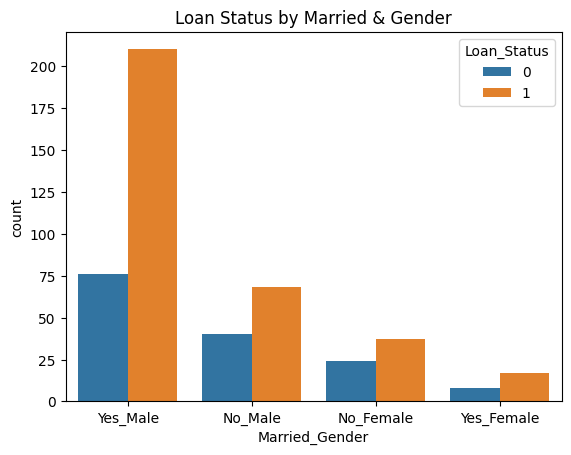

In [209]:
#Visulizing relationship between married and man, get a loan
loan_data['Married_Gender'] = loan_data['Married'] + '_' + loan_data['Gender']

sns.countplot(x='Married_Gender', hue='Loan_Status', data=loan_data)
plt.title('Loan Status by Married & Gender')
plt.show()

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

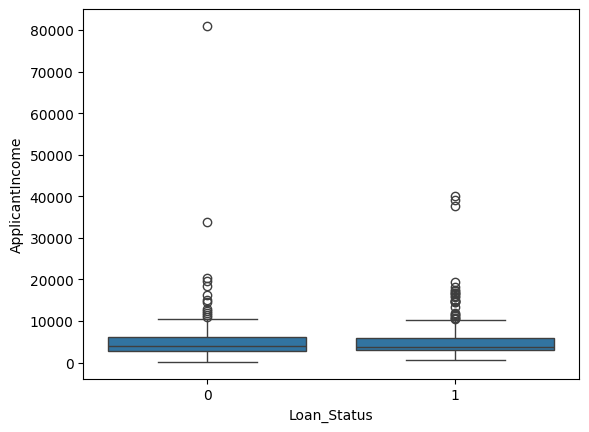

In [210]:
#checking applicant income and chanses to get loan
sns.boxplot(y='ApplicantIncome', x='Loan_Status', data=loan_data)

In [211]:
loan_data.replace({'Married' : {'Yes' : 1, 'No' : 0}}, inplace= True)
loan_data.replace({'Gender' : {'Male' : 1, 'Female' : 0}}, inplace = True)
loan_data.replace({'Self_Employed' : {'Yes' : 1, 'No' : 0}}, inplace = True)
loan_data.replace({'Education' : {'Graduate' : 1, 'Not Graduate' : 0}}, inplace = True)
loan_data.replace({'Property_Area' : {'Urban' : 2, 'Semiurban' : 1, 'Rural' : 0}}, inplace = True)

<ipython-input-211-66b725e774a5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({'Married' : {'Yes' : 1, 'No' : 0}}, inplace= True)
<ipython-input-211-66b725e774a5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data.replace({'Gender' : {'Male' : 1, 'Female' : 0}}, inplace = True)
<ipython-input-211-66b725e774a5>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-

In [225]:
loan_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Married_Gender
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1,No_Female
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1,Yes_Male
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1,Yes_Male
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1,Yes_Male
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0,No_Female


### **Splitting Data for input and output**

In [213]:
x = loan_data.drop(columns=['Loan_Status','Married_Gender','Loan_ID'],axis =1)
y = loan_data['Loan_Status']

### **Splitting Data for Training and Testing Model**

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35, stratify=y, random_state =8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(312, 11) (168, 11) (312,) (168,)


### **Choosing Model**

In [215]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [216]:
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)


SVC()

### **Evaluation of Data**

In [217]:
#Evaluation of data
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [218]:
#Checking Accuracy score
y_train_mse = mean_squared_error(y_train, y_train_pred)
y_train_r2 = r2_score(y_train, y_train_pred)
print(y_train_mse, y_train_r2 )
y_test_mse = mean_squared_error(y_test, y_test_pred)
y_test_r2 = r2_score(y_test, y_test_pred)
print(y_test_mse, y_test_r2 )

0.0 1.0
0.19642857142857142 0.08090185676392592


In [219]:
#Evaluation of SVR
svm_y_train_pred = svm_model.predict(x_train)
svm_y_test_pred = svm_model.predict(x_test)

In [220]:
svm_y_train_acc = accuracy_score(svm_y_train_pred,y_train)
svm_y_test_acc = accuracy_score( svm_y_test_pred,y_test)
print(svm_y_train_acc, svm_y_test_acc)

0.7051282051282052 0.6904761904761905


#Checking **Accuracy**

In [229]:
# it's very close, we can use both regression and svr both for prediction now
input_data = (1	,1	,4	,1	,0	,9000	,0.0	,220.0	,360.0	,1.0	,1)
input_data_array = np.array(input_data)
input_data_reshape = input_data_array.reshape(1,-1)
prediction_rf = rf.predict(input_data_reshape)
prediction_svm = svm_model.predict(input_data_reshape)
print( prediction_svm[0], prediction_rf[0])


#Conclusion : Random forest Classifier is more accurate than Support Vector Machine SVC
# Reason : by input of 5 Random forest provided 5 correct output
#          and in other hand SVC provided 2 correct output (it could be better on a larger scale of DATA)

1 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
